In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [63]:
from google.colab import files
uploaded = files.upload()


Saving health_risk_dataset.csv to health_risk_dataset (2).csv


In [64]:
df = pd.read_csv("health_risk_dataset.csv")


In [65]:

df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56.0,67.0,195.0,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69.0,76.0,170.0,high,6.9,NaN,no,NaN,no,teacher,26.3,NaN
2,46.0,106.0,153.0,high,6.6,low,yes,no,no,artist,45.3,high
3,32.0,54.0,186.0,medium,8.5,medium,no,no,no,artist,15.6,low
4,60.0,98.0,195.0,high,8.0,low,no,no,yes,teacher,25.8,high


In [66]:

df.shape

(5000, 12)

In [67]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           4574 non-null   float64
 1   weight        4596 non-null   float64
 2   height        4604 non-null   float64
 3   exercise      4592 non-null   object 
 4   sleep         4600 non-null   float64
 5   sugar_intake  4592 non-null   object 
 6   smoking       4623 non-null   object 
 7   alcohol       4579 non-null   object 
 8   married       4615 non-null   object 
 9   profession    4608 non-null   object 
 10  bmi           4592 non-null   float64
 11  health_risk   4592 non-null   object 
dtypes: float64(5), object(7)
memory usage: 468.9+ KB


In [68]:

df.describe()

,age,weight,height,sleep,bmi
count,4574.000000,4596.000000,4604.000000,4600.000000,4592.000000
mean,48.941189,77.287641,172.004996,7.004457,26.872496
std,17.848778,18.753494,15.835997,1.432973,8.299846
min,18.000000,45.000000,145.000000,3.000000,11.400000
25%,34.000000,61.000000,159.000000,6.000000,20.375000
50%,49.000000,77.000000,172.000000,7.000000,26.000000
75%,64.000000,94.000000,186.000000,8.000000,32.400000
max,79.000000,109.000000,199.000000,10.000000,51.400000


In [69]:
df.isnull().sum()

,0
age,426
weight,404
height,396
exercise,408
sleep,400
sugar_intake,408
smoking,377
alcohol,421
married,385
profession,392


In [70]:
# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns

In [71]:
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [72]:
# Numerical columns with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [73]:

#Remove Duplicate
df.drop_duplicates(inplace=True)


In [74]:
df.isnull().sum()

,0
age,0
weight,0
height,0
exercise,0
sleep,0
sugar_intake,0
smoking,0
alcohol,0
married,0
profession,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   float64
 1   weight        5000 non-null   float64
 2   height        5000 non-null   float64
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(5), object(7)
memory usage: 468.9+ KB


In [76]:
#drop bmi column
df = df.drop(columns=['bmi'])


In [77]:
# checking value counts for all columns
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
 print(df[col].value_counts())


exercise
medium    2226
low       1174
high       923
none       677
Name: count, dtype: int64
sugar_intake
medium    2705
low       1360
high       935
Name: count, dtype: int64
smoking
no     4095
yes     905
Name: count, dtype: int64
alcohol
no     3834
yes    1166
Name: count, dtype: int64
married
yes    3160
no     1840
Name: count, dtype: int64
profession
student          988
farmer           590
doctor           586
driver           575
engineer         571
teacher          570
artist           564
office_worker    556
Name: count, dtype: int64
health_risk
high    3609
low     1391
Name: count, dtype: int64


#Outlier Detection

In [78]:
#only numeric column
num_cols = ['age', 'weight', 'height', 'sleep']
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) |
            (df[num_cols] > (Q3 + 1.5 * IQR)))

outliers.sum().sort_values(ascending=False)


,0
sleep,22
age,0
weight,0
height,0


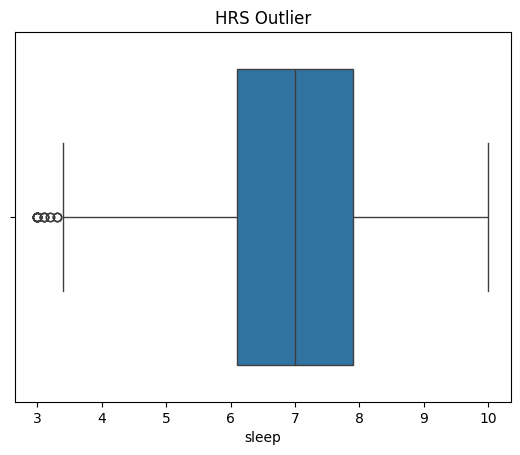

In [79]:


sns.boxplot(x=df['sleep'])
plt.title("HRS Outlier")
plt.show()


In [80]:
lower_bound = Q1['sleep'] - 1.5 * IQR['sleep']
upper_bound = Q3['sleep'] + 1.5 * IQR['sleep']

df = df[(df['sleep'] >= lower_bound) & (df['sleep'] <= upper_bound)]


In [81]:
print("Min hrs after outlier removal:", df['sleep'].max())
print("Dataset shape after outlier removal:", df.shape)


Min hrs after outlier removal: 10.0
Dataset shape after outlier removal: (4978, 11)


In [82]:
df.shape

(4978, 11)

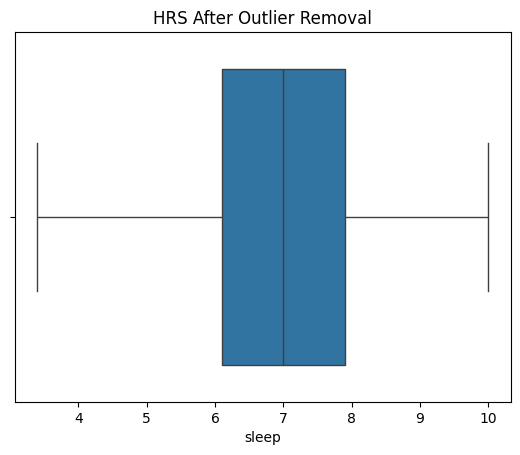

In [83]:


sns.boxplot(x=df['sleep'])
plt.title("HRS After Outlier Removal")
plt.show()


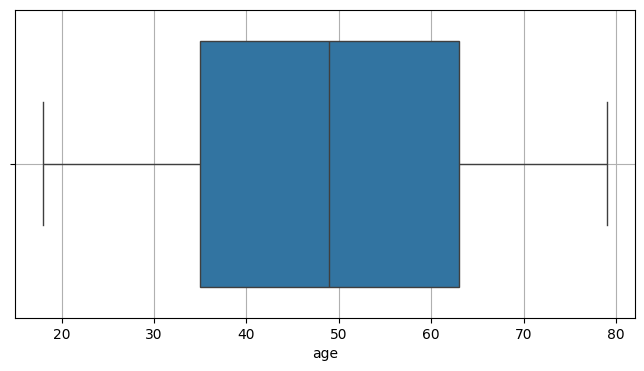

In [84]:
# for age
plt.figure(figsize=(8,4))
sns.boxplot(x=df['age'])
plt.grid()
plt.show()

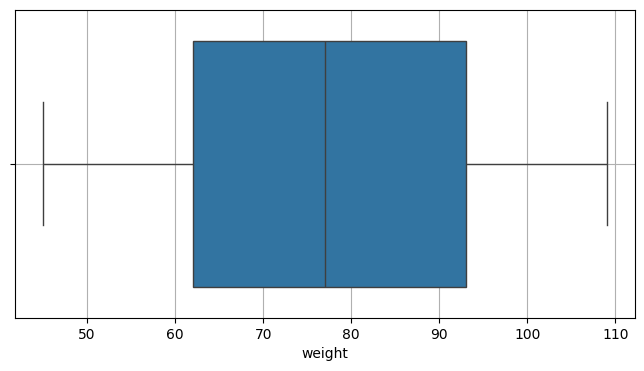

In [85]:
# for weight
plt.figure(figsize=(8,4))
sns.boxplot(x=df['weight'])
plt.grid()
plt.show()

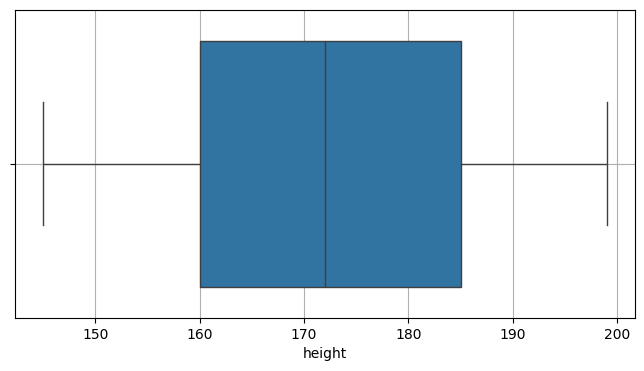

In [86]:
# for height
plt.figure(figsize=(8,4))
sns.boxplot(x=df['height'])
plt.grid()
plt.show()

#Skewness Checking


age
-0.028697055318998077


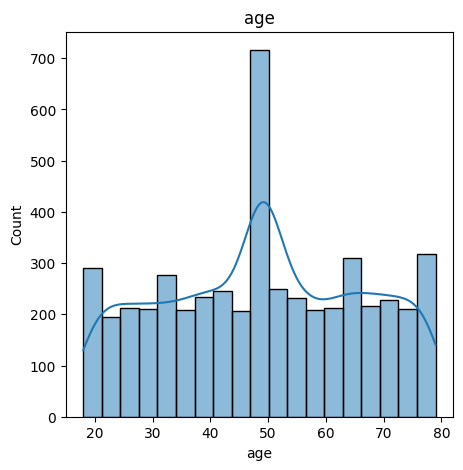

weight
0.0024741049639438735


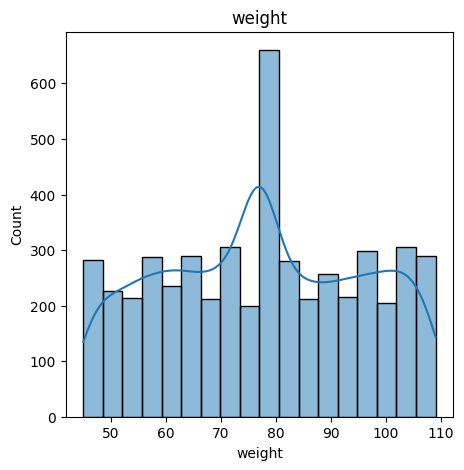

height
0.019111262609597897


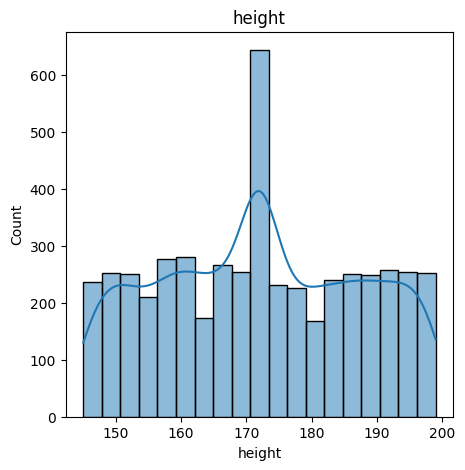

sleep
-0.006180395145317241


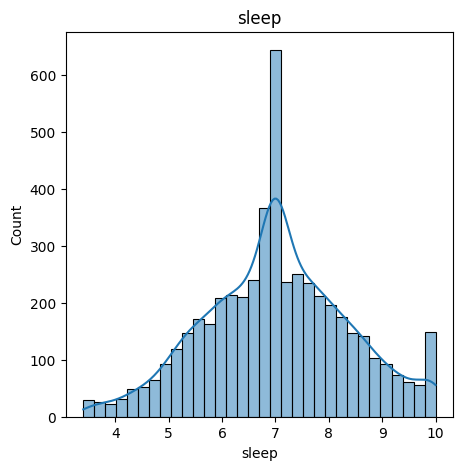

In [87]:
from scipy.stats import skew
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
 print(col)
 print(skew(df[col]))
 plt.figure(figsize=(5,5))
 sns.histplot(df[col], kde=True)
 plt.title(col)
 plt.show()

#Encoding

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#target Column
df['health_risk'] = le.fit_transform(df['health_risk'])


In [89]:

# Binary columns
df['smoking'] = le.fit_transform(df['smoking'])     # no=0, yes=1
df['alcohol'] = le.fit_transform(df['alcohol'])     # no=0, yes=1
df['married'] = le.fit_transform(df['married'])     # no=0, yes=1

# Ordinal columns
df['exercise'] = le.fit_transform(df['exercise'])   # low, medium, high
df['sugar_intake'] = le.fit_transform(df['sugar_intake'])  # low, medium, high



In [90]:
# encoding by one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
ohe_col=['profession']
encoded=ohe.fit_transform(df[ohe_col]).toarray()

encoded_df =pd.DataFrame(encoded,columns=ohe.get_feature_names_out(ohe_col))
df = df.drop(columns=ohe_col)
df = pd.concat([df.reset_index(drop=True),
encoded_df.reset_index(drop=True)],axis=1)


In [91]:
df.head()

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,health_risk,profession_artist,profession_doctor,profession_driver,profession_engineer,profession_farmer,profession_office_worker,profession_student,profession_teacher
0,56.0,67.0,195.0,1,6.1,2,1,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,69.0,76.0,170.0,0,6.9,2,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.0,106.0,153.0,0,6.6,1,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32.0,54.0,186.0,2,8.5,2,0,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,98.0,195.0,0,8.0,1,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#EDA

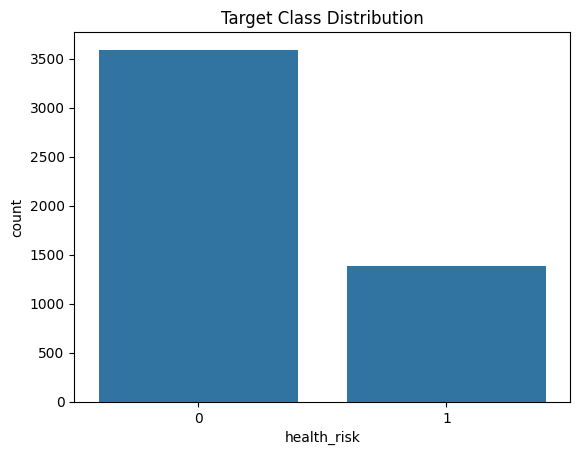

In [92]:
sns.countplot(x='health_risk', data=df)
plt.title("Target Class Distribution")
plt.show()

#Separate X & Y

In [93]:
X = df.drop('health_risk', axis=1)
y = df['health_risk']

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)

In [95]:
# Identify Categorical & Numeric Columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include='object').columns

In [96]:
# ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num',
StandardScaler(), num_cols),('cat', OneHotEncoder(), cat_cols)])

#Model Building

Logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)



In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       719
           1       0.69      0.58      0.63       277

    accuracy                           0.81       996
   macro avg       0.77      0.74      0.75       996
weighted avg       0.80      0.81      0.81       996



HPT using solver

In [99]:
lr=LogisticRegression(solver='newton-cg')
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       719
           1       0.71      0.60      0.65       277

    accuracy                           0.82       996
   macro avg       0.78      0.75      0.77       996
weighted avg       0.81      0.82      0.82       996



In [100]:
lr=LogisticRegression(solver='newton-cholesky')
lr.fit(X_train,y_train)
ypred=lr.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       719
           1       0.71      0.60      0.65       277

    accuracy                           0.82       996
   macro avg       0.78      0.75      0.77       996
weighted avg       0.81      0.82      0.82       996



#SVM

In [101]:
#svm
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       719
           1       0.68      0.36      0.47       277

    accuracy                           0.78       996
   macro avg       0.74      0.65      0.67       996
weighted avg       0.76      0.78      0.75       996



HPT using kernel


In [102]:
svm=SVC(kernel='poly')
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       719
           1       0.69      0.39      0.50       277

    accuracy                           0.78       996
   macro avg       0.74      0.66      0.68       996
weighted avg       0.77      0.78      0.76       996



In [103]:
svm=SVC(kernel='sigmoid')
svm.fit(X_train,y_train)
ypred=svm.predict(X_test)
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.75      0.81      0.78       719
           1       0.38      0.31      0.34       277

    accuracy                           0.67       996
   macro avg       0.57      0.56      0.56       996
weighted avg       0.65      0.67      0.66       996



#KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       719
           1       0.62      0.53      0.58       277

    accuracy                           0.78       996
   macro avg       0.73      0.71      0.71       996
weighted avg       0.77      0.78      0.78       996



HPT

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac_list=[]
for i in range(1,51):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  ypred=knn.predict(X_test)
  ac=accuracy_score(y_test,ypred)
  ac_list.append(ac)

In [106]:
ac_list

[0.7590361445783133,
 0.7680722891566265,
 0.7771084337349398,
 0.7831325301204819,
 0.7811244979919679,
 0.7841365461847389,
 0.785140562248996,
 0.7791164658634538,
 0.7891566265060241,
 0.785140562248996,
 0.7891566265060241,
 0.7821285140562249,
 0.7881526104417671,
 0.7871485943775101,
 0.7901606425702812,
 0.7931726907630522,
 0.7901606425702812,
 0.7911646586345381,
 0.7931726907630522,
 0.7941767068273092,
 0.7921686746987951,
 0.7931726907630522,
 0.7941767068273092,
 0.7951807228915663,
 0.7941767068273092,
 0.7951807228915663,
 0.7961847389558233,
 0.7931726907630522,
 0.7941767068273092,
 0.7991967871485943,
 0.7921686746987951,
 0.7941767068273092,
 0.7971887550200804,
 0.7931726907630522,
 0.7951807228915663,
 0.7961847389558233,
 0.7971887550200804,
 0.8012048192771084,
 0.7981927710843374,
 0.7981927710843374,
 0.7981927710843374,
 0.7971887550200804,
 0.7951807228915663,
 0.7951807228915663,
 0.7981927710843374,
 0.7991967871485943,
 0.7961847389558233,
 0.797188755020

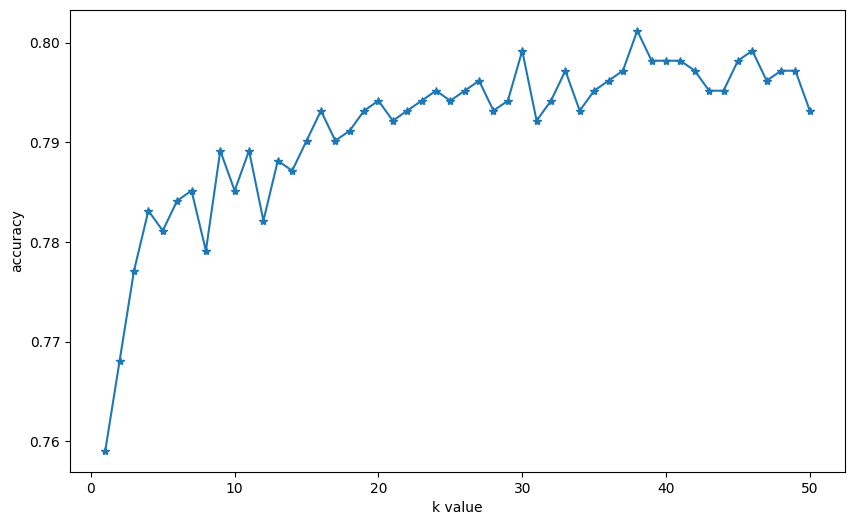

In [107]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),ac_list,marker="*")
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train,y_train)
ypred=knn.predict(X_test)
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87       719
           1       0.68      0.52      0.59       277

    accuracy                           0.80       996
   macro avg       0.75      0.71      0.73       996
weighted avg       0.79      0.80      0.79       996



#Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       719
           1       0.69      0.69      0.69       277

    accuracy                           0.83       996
   macro avg       0.78      0.79      0.78       996
weighted avg       0.83      0.83      0.83       996



In [110]:
# check overfitting
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.8263052208835341


• max_depth
• min_sample_Leaf
• min_sample_split

In [111]:
from sklearn.metrics import accuracy_score
# max_depth
for i in range(1,31):
 dt1=DecisionTreeClassifier(max_depth=i)
 dt1.fit(X_train,y_train)
 ypred=dt1.predict(X_test)
 ac=accuracy_score(y_test,ypred)
 print(f"Max_depth{i} accuracy_score{ac}")


Max_depth1 accuracy_score0.7218875502008032
Max_depth2 accuracy_score0.751004016064257
Max_depth3 accuracy_score0.786144578313253
Max_depth4 accuracy_score0.7951807228915663
Max_depth5 accuracy_score0.8152610441767069
Max_depth6 accuracy_score0.8142570281124498
Max_depth7 accuracy_score0.8313253012048193
Max_depth8 accuracy_score0.8293172690763052
Max_depth9 accuracy_score0.8504016064257028
Max_depth10 accuracy_score0.8493975903614458
Max_depth11 accuracy_score0.8453815261044176
Max_depth12 accuracy_score0.8514056224899599
Max_depth13 accuracy_score0.8504016064257028
Max_depth14 accuracy_score0.8333333333333334
Max_depth15 accuracy_score0.8363453815261044
Max_depth16 accuracy_score0.8383534136546185
Max_depth17 accuracy_score0.8363453815261044
Max_depth18 accuracy_score0.8293172690763052
Max_depth19 accuracy_score0.8333333333333334
Max_depth20 accuracy_score0.8383534136546185
Max_depth21 accuracy_score0.8273092369477911
Max_depth22 accuracy_score0.8293172690763052
Max_depth23 accuracy_

In [112]:
dt2=DecisionTreeClassifier(max_depth=9)
dt2.fit(X_train, y_train)
ypred = dt2.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       719
           1       0.72      0.77      0.74       277

    accuracy                           0.85       996
   macro avg       0.81      0.83      0.82       996
weighted avg       0.86      0.85      0.85       996



In [113]:
# check overfitting
print(dt2.score(X_train,y_train))
print(dt2.score(X_test,y_test))

0.9083375188347564
0.8514056224899599


In [114]:
# min_samples_leaf
for i in range(1,31):
 dt3=DecisionTreeClassifier(min_samples_leaf=i)
 dt3.fit(X_train,y_train)
 ypred=dt3.predict(X_test)
 ac=accuracy_score(y_test,ypred)
 print(f"Min_samples_leaf{i} accuracy_score{ac}")

Min_samples_leaf1 accuracy_score0.8303212851405622
Min_samples_leaf2 accuracy_score0.8323293172690763
Min_samples_leaf3 accuracy_score0.8232931726907631
Min_samples_leaf4 accuracy_score0.8473895582329317
Min_samples_leaf5 accuracy_score0.8504016064257028
Min_samples_leaf6 accuracy_score0.8463855421686747
Min_samples_leaf7 accuracy_score0.8483935742971888
Min_samples_leaf8 accuracy_score0.8483935742971888
Min_samples_leaf9 accuracy_score0.8514056224899599
Min_samples_leaf10 accuracy_score0.857429718875502
Min_samples_leaf11 accuracy_score0.8594377510040161
Min_samples_leaf12 accuracy_score0.8544176706827309
Min_samples_leaf13 accuracy_score0.8514056224899599
Min_samples_leaf14 accuracy_score0.858433734939759
Min_samples_leaf15 accuracy_score0.8604417670682731
Min_samples_leaf16 accuracy_score0.8604417670682731
Min_samples_leaf17 accuracy_score0.8483935742971888
Min_samples_leaf18 accuracy_score0.8504016064257028
Min_samples_leaf19 accuracy_score0.8554216867469879
Min_samples_leaf20 accu

In [115]:
dt4=DecisionTreeClassifier(min_samples_leaf=23)
dt4.fit(X_train, y_train)
ypred = dt4.predict(X_test)
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.91      0.90      0.90       719
           1       0.75      0.76      0.75       277

    accuracy                           0.86       996
   macro avg       0.83      0.83      0.83       996
weighted avg       0.86      0.86      0.86       996



In [116]:
print(dt4.score(X_train,y_train))
print(dt4.score(X_test,y_test))


0.8842290306378704
0.8614457831325302


#Random Forest & Gradient Boosting


In [117]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ypred=rf.predict(X_test)
print(classification_report(y_test,ypred))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       719
           1       0.77      0.69      0.72       277

    accuracy                           0.85       996
   macro avg       0.82      0.80      0.81       996
weighted avg       0.85      0.85      0.85       996



In [118]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
ypred=gb.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       719
           1       0.79      0.73      0.76       277

    accuracy                           0.87       996
   macro avg       0.84      0.83      0.83       996
weighted avg       0.87      0.87      0.87       996



#Comparing all agorithms accuracy

In [119]:
from sklearn.metrics import accuracy_score

# Make predictions for each model
lr_ypred = lr.predict(X_test)
knn_ypred = knn.predict(X_test)
dt_ypred = dt4.predict(X_test) # Using dt4 which was optimized for Decision Tree
rf_ypred = rf.predict(X_test)
svm_ypred = svm.predict(X_test)
gb_ypred = gb.predict(X_test)

accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, lr_ypred),
    "KNN": accuracy_score(y_test, knn_ypred),
    "Decision Tree": accuracy_score(y_test, dt_ypred),
    "Random Forest": accuracy_score(y_test, rf_ypred),
    "SVM": accuracy_score(y_test, svm_ypred),
    "Gradient Boosting": accuracy_score(y_test, gb_ypred)
}

In [120]:
accuracy_df = pd.DataFrame({
    "Model": accuracy_results.keys(),
    "Accuracy": accuracy_results.values()
}).sort_values(by="Accuracy", ascending=False)

accuracy_df


,Model,Accuracy
5,Gradient Boosting,0.869478
2,Decision Tree,0.861446
3,Random Forest,0.854418
0,Logistic Regression,0.820281
1,KNN,0.798193
4,SVM,0.667671


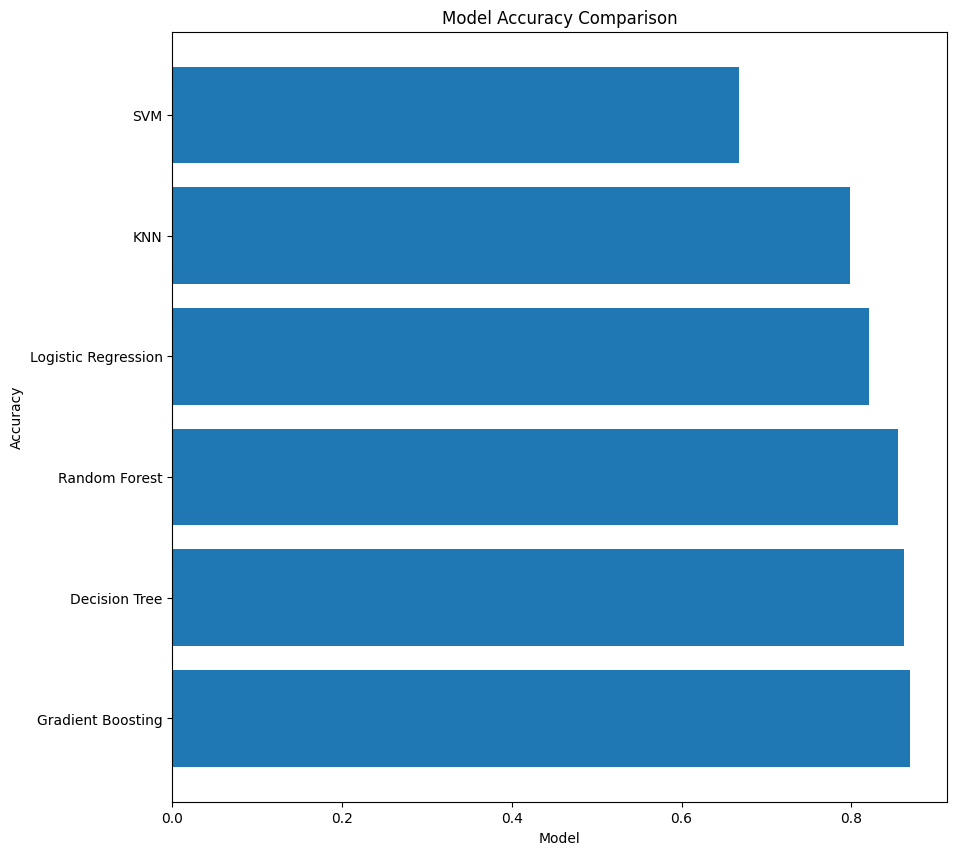

In [121]:
#plot accury score
plt.figure(figsize=(10,10))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()